In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.shape

(3960, 82)

In [4]:
df_test.shape

(20, 59)

In [5]:
df_train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_test.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Columns in Train Set: ", df_train.columns)
print("Columns in Test Set: ", df_test.columns)

Columns in Train Set:  Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-

PCIAT features should not be used for modeling since SII is derived from PCIAT, which means including them will lead to data leakage.

# Data Cleaning

In [8]:
columns_to_keep = [col for col in df_train.columns if col in df_test.columns or col == 'sii']

df_train = df_train[columns_to_keep]

print("Updated Columns in Train Set: ", df_train.columns)
print("Columns in Test Set: ", df_test.columns)

Updated Columns in Train Set:  Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW

In [9]:
for col, dtype in df_train.dtypes.items():
    print(f"Column '{col}' has data type: {dtype}") # categorical int shown as int or float data types

Column 'id' has data type: object
Column 'Basic_Demos-Enroll_Season' has data type: object
Column 'Basic_Demos-Age' has data type: int64
Column 'Basic_Demos-Sex' has data type: int64
Column 'CGAS-Season' has data type: object
Column 'CGAS-CGAS_Score' has data type: float64
Column 'Physical-Season' has data type: object
Column 'Physical-BMI' has data type: float64
Column 'Physical-Height' has data type: float64
Column 'Physical-Weight' has data type: float64
Column 'Physical-Waist_Circumference' has data type: float64
Column 'Physical-Diastolic_BP' has data type: float64
Column 'Physical-HeartRate' has data type: float64
Column 'Physical-Systolic_BP' has data type: float64
Column 'Fitness_Endurance-Season' has data type: object
Column 'Fitness_Endurance-Max_Stage' has data type: float64
Column 'Fitness_Endurance-Time_Mins' has data type: float64
Column 'Fitness_Endurance-Time_Sec' has data type: float64
Column 'FGC-Season' has data type: object
Column 'FGC-FGC_CU' has data type: float64

In [10]:
df_train['Basic_Demos-Sex'] = df_train['Basic_Demos-Sex'].replace({0: 'Male', 1: 'Female'})
df_train['FGC-FGC_CU_Zone'] = df_train['FGC-FGC_CU_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['FGC-FGC_GSND_Zone'] = df_train['FGC-FGC_GSND_Zone'].replace({1: 'Weak', 2: 'Normal', 3: 'Strong'})
df_train['FGC-FGC_GSD_Zone'] = df_train['FGC-FGC_GSD_Zone'].replace({1: 'Weak', 2: 'Normal', 3: 'Strong'})
df_train['FGC-FGC_PU_Zone'] = df_train['FGC-FGC_PU_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['FGC-FGC_SRL_Zone'] = df_train['FGC-FGC_SRL_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['FGC-FGC_SRR_Zone'] = df_train['FGC-FGC_SRR_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['FGC-FGC_TL_Zone'] = df_train['FGC-FGC_TL_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['BIA-BIA_Activity_Level_num'] = df_train['BIA-BIA_Activity_Level_num'].replace({1: 'Very Light', 2: 'Light', 3: 'Moderate', 4: 'Heavy', 5: 'Exceptional'})
df_train['BIA-BIA_Frame_num'] = df_train['BIA-BIA_Frame_num'].replace({1: 'Small', 2: 'Medium', 3: 'Large'})
# df_train['PCIAT-PCIAT_01'] = df_train['PCIAT-PCIAT_01'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_02'] = df_train['PCIAT-PCIAT_02'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_03'] = df_train['PCIAT-PCIAT_03'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_04'] = df_train['PCIAT-PCIAT_04'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_05'] = df_train['PCIAT-PCIAT_05'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_06'] = df_train['PCIAT-PCIAT_06'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_07'] = df_train['PCIAT-PCIAT_07'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_08'] = df_train['PCIAT-PCIAT_08'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_09'] = df_train['PCIAT-PCIAT_09'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_10'] = df_train['PCIAT-PCIAT_10'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_11'] = df_train['PCIAT-PCIAT_11'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_12'] = df_train['PCIAT-PCIAT_12'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_13'] = df_train['PCIAT-PCIAT_13'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_14'] = df_train['PCIAT-PCIAT_14'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_15'] = df_train['PCIAT-PCIAT_15'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_16'] = df_train['PCIAT-PCIAT_16'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_17'] = df_train['PCIAT-PCIAT_17'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_18'] = df_train['PCIAT-PCIAT_18'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_19'] = df_train['PCIAT-PCIAT_19'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_20'] = df_train['PCIAT-PCIAT_20'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
df_train['PreInt_EduHx-computerinternet_hoursday'] = df_train['PreInt_EduHx-computerinternet_hoursday'].replace({0: 'Less than 1h/day', 1: 'Around 1h/day', 2: 'Around 2hs/day', 3: 'More than 3hs/day'})
df_train['sii'] = df_train['sii'].replace({0: 'Not Addicted', 1: 'Mildly Addicted', 2: 'Moderately Addicted', 3: 'Severely Addicted'})

In [11]:
print("Total number of inf values:\n",df_train.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum()))

Total number of inf values:
 Basic_Demos-Age                 0
CGAS-CGAS_Score                 0
Physical-BMI                    0
Physical-Height                 0
Physical-Weight                 0
Physical-Waist_Circumference    0
Physical-Diastolic_BP           0
Physical-HeartRate              0
Physical-Systolic_BP            0
Fitness_Endurance-Max_Stage     0
Fitness_Endurance-Time_Mins     0
Fitness_Endurance-Time_Sec      0
FGC-FGC_CU                      0
FGC-FGC_GSND                    0
FGC-FGC_GSD                     0
FGC-FGC_PU                      0
FGC-FGC_SRL                     0
FGC-FGC_SRR                     0
FGC-FGC_TL                      0
BIA-BIA_BMC                     0
BIA-BIA_BMI                     0
BIA-BIA_BMR                     0
BIA-BIA_DEE                     0
BIA-BIA_ECW                     0
BIA-BIA_FFM                     0
BIA-BIA_FFMI                    0
BIA-BIA_FMI                     0
BIA-BIA_Fat                     0
BIA-BIA_ICW        

In [12]:
print("Total number of NaN values: ", df_train.isna().sum())

Total number of NaN values:  id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
CGAS-CGAS_Score                           1539
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Season                  2652
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-Season                                 614
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                

In [13]:
df_train_labelled = df_train[df_train['sii'].notna()]
df_train_labelled.shape

(2736, 60)

In [14]:
df_train_unlabelled = df_train[df_train['sii'].isna()]
df_train_unlabelled.shape

(1224, 60)

In [15]:
nan_percentage = (df_train_labelled.isna().sum()/len(df_train_labelled))*100
print("Percentage of NaN values in each column:\n", nan_percentage)

Percentage of NaN values in each column:
 id                                         0.000000
Basic_Demos-Enroll_Season                  0.000000
Basic_Demos-Age                            0.000000
Basic_Demos-Sex                            0.000000
CGAS-Season                               14.400585
CGAS-CGAS_Score                           14.400585
Physical-Season                            5.153509
Physical-BMI                               7.638889
Physical-Height                            7.529240
Physical-Weight                            5.994152
Physical-Waist_Circumference              82.346491
Physical-Diastolic_BP                      9.429825
Physical-HeartRate                         9.137427
Physical-Systolic_BP                       9.429825
Fitness_Endurance-Season                  53.947368
Fitness_Endurance-Max_Stage               73.282164
Fitness_Endurance-Time_Mins               73.391813
Fitness_Endurance-Time_Sec                73.391813
FGC-Season            

In [16]:
df_train_labelled = df_train_labelled.loc[:, nan_percentage <= 80]

In [17]:
df_train_labelled.shape

(2736, 57)

In [18]:
y = df_train_labelled[['sii']]
X = df_train_labelled.drop(columns=['sii'])

In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

knn_imputer = KNNImputer(n_neighbors=5)
label_encoder = LabelEncoder()

def impute_data(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Apply KNN imputation for numeric columns
            df[column] = knn_imputer.fit_transform(df[[column]])
        else:
            # Apply mode imputation for categorical columns
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
    return df

X_train = impute_data(X)

C:\Users\sudha\AppData\Local\Temp\ipykernel_30836\2614837233.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
C:\Users\sudha\AppData\Local\Temp\ipykernel_30836\2614837233.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [20]:
nan_percentage = (X_train.isna().sum()/len(X_train))*100
nan_percentage

id                                        0.0
Basic_Demos-Enroll_Season                 0.0
Basic_Demos-Age                           0.0
Basic_Demos-Sex                           0.0
CGAS-Season                               0.0
CGAS-CGAS_Score                           0.0
Physical-Season                           0.0
Physical-BMI                              0.0
Physical-Height                           0.0
Physical-Weight                           0.0
Physical-Diastolic_BP                     0.0
Physical-HeartRate                        0.0
Physical-Systolic_BP                      0.0
Fitness_Endurance-Season                  0.0
Fitness_Endurance-Max_Stage               0.0
Fitness_Endurance-Time_Mins               0.0
Fitness_Endurance-Time_Sec                0.0
FGC-Season                                0.0
FGC-FGC_CU                                0.0
FGC-FGC_CU_Zone                           0.0
FGC-FGC_GSND                              0.0
FGC-FGC_GSND_Zone                 

In [21]:
X_train = X_train.drop(columns=['id'])

In [22]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Basic_Demos-Enroll_Season', 'Basic_Demos-Sex', 'CGAS-Season',
       'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season',
       'FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num',
       'BIA-BIA_Frame_num', 'PAQ_C-Season', 'SDS-Season',
       'PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday'],
      dtype='object')


In [23]:
ordinal_columns = ['FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_Frame_num', 'PreInt_EduHx-computerinternet_hoursday']
onehot_columns = [col for col in categorical_columns if col not in ordinal_columns]

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train[ordinal_columns] = ordinal_encoder.fit_transform(X_train[ordinal_columns])

In [25]:
for col, dtype in X_train.dtypes.items():
    print(f"Column '{col}' has data type: {dtype}")

Column 'Basic_Demos-Enroll_Season' has data type: object
Column 'Basic_Demos-Age' has data type: float64
Column 'Basic_Demos-Sex' has data type: object
Column 'CGAS-Season' has data type: object
Column 'CGAS-CGAS_Score' has data type: float64
Column 'Physical-Season' has data type: object
Column 'Physical-BMI' has data type: float64
Column 'Physical-Height' has data type: float64
Column 'Physical-Weight' has data type: float64
Column 'Physical-Diastolic_BP' has data type: float64
Column 'Physical-HeartRate' has data type: float64
Column 'Physical-Systolic_BP' has data type: float64
Column 'Fitness_Endurance-Season' has data type: object
Column 'Fitness_Endurance-Max_Stage' has data type: float64
Column 'Fitness_Endurance-Time_Mins' has data type: float64
Column 'Fitness_Endurance-Time_Sec' has data type: float64
Column 'FGC-Season' has data type: object
Column 'FGC-FGC_CU' has data type: float64
Column 'FGC-FGC_CU_Zone' has data type: float64
Column 'FGC-FGC_GSND' has data type: float6

In [26]:
print(X_train.shape)
print(y.shape)

(2736, 55)
(2736, 1)


In [27]:
X_train.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,...,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,Fall,5.0,Male,Winter,51.000000,Fall,16.877316,46.0,50.8,69.755044,...,38.91770,19.541300,32.6909,Spring,2.590608,Spring,40.977839,57.647525,Fall,3.0
1,Summer,9.0,Male,Spring,65.159266,Fall,14.035590,48.0,46.0,75.000000,...,39.44970,15.410700,27.0552,Fall,2.340000,Fall,46.000000,64.000000,Summer,2.0
2,Summer,10.0,Female,Fall,71.000000,Fall,16.648696,56.5,75.6,65.000000,...,67.02313,34.372294,53.9165,Summer,2.170000,Fall,38.000000,54.000000,Summer,1.0
3,Winter,9.0,Male,Fall,71.000000,Summer,18.292347,56.0,81.6,60.000000,...,58.93380,26.479800,45.9966,Winter,2.451000,Summer,31.000000,45.000000,Winter,2.0
5,Spring,13.0,Female,Winter,50.000000,Summer,22.279952,59.5,112.2,60.000000,...,79.69820,35.380400,63.1265,Spring,4.110000,Summer,40.000000,56.000000,Spring,2.0


In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
X_train_onehot = encoder.fit_transform(X_train[onehot_columns])
onehot_df = pd.DataFrame(X_train_onehot, columns=encoder.get_feature_names_out(onehot_columns), index=X_train.index)
X_train = pd.concat([X_train.drop(columns=onehot_columns), onehot_df], axis=1)

print(X_train.shape)

(2736, 83)


In [29]:
for col, dtype in X_train.dtypes.items():
    print(f"Column '{col}' has data type: {dtype}")

Column 'Basic_Demos-Age' has data type: float64
Column 'CGAS-CGAS_Score' has data type: float64
Column 'Physical-BMI' has data type: float64
Column 'Physical-Height' has data type: float64
Column 'Physical-Weight' has data type: float64
Column 'Physical-Diastolic_BP' has data type: float64
Column 'Physical-HeartRate' has data type: float64
Column 'Physical-Systolic_BP' has data type: float64
Column 'Fitness_Endurance-Max_Stage' has data type: float64
Column 'Fitness_Endurance-Time_Mins' has data type: float64
Column 'Fitness_Endurance-Time_Sec' has data type: float64
Column 'FGC-FGC_CU' has data type: float64
Column 'FGC-FGC_CU_Zone' has data type: float64
Column 'FGC-FGC_GSND' has data type: float64
Column 'FGC-FGC_GSND_Zone' has data type: float64
Column 'FGC-FGC_GSD' has data type: float64
Column 'FGC-FGC_GSD_Zone' has data type: float64
Column 'FGC-FGC_PU' has data type: float64
Column 'FGC-FGC_PU_Zone' has data type: float64
Column 'FGC-FGC_SRL' has data type: float64
Column 'FGC-

# Next Steps:
   1) Correlation
   2) Feature Importance
   3) Do encoding on test dataset

In [30]:
X_train.describe()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,...,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,10.238670,65.159266,19.125667,55.897051,87.839592,69.755044,81.823411,117.127926,5.001368,7.394231,...,0.125000,0.140716,0.221126,0.329313,0.219664,0.229898,0.250000,0.272295,0.238304,0.239401
std,3.427982,10.927241,4.718000,7.110994,42.033187,13.123660,13.125404,16.389305,1.041901,1.639755,...,0.330779,0.347792,0.415081,0.470050,0.414095,0.420844,0.433092,0.445222,0.426124,0.426796
min,5.000000,25.000000,0.000000,36.000000,0.000000,11.000000,27.000000,49.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,60.000000,15.916620,50.500000,58.200000,62.000000,73.000000,107.000000,5.001368,7.394231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,65.159266,18.274247,55.897051,79.200000,69.000000,81.823411,116.000000,5.001368,7.394231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,71.000000,20.829292,61.000000,108.600000,75.000000,90.000000,124.000000,5.001368,7.394231,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000
max,22.000000,95.000000,46.102914,78.500000,315.000000,179.000000,138.000000,203.000000,28.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
y.describe()

,sii
count,2736
unique,4
top,Not Addicted
freq,1594


In [32]:
type(y)

pandas.core.frame.DataFrame

In [33]:
# Ordinal Encoding for y
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted']])
y_encoded = encoder.fit_transform(y[['sii']])
y_encoded = pd.DataFrame(y_encoded, columns=['sii'])
y = y_encoded

y.head()

,sii
0,2.0
1,0.0
2,0.0
3,1.0
4,1.0


In [34]:
for col, dtype in y.dtypes.items():
    print(f"Column '{col}' has data type: {dtype}")

Column 'sii' has data type: float64


# Feature Transformation - Standardization

In [35]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit_transform(X_train)

X_train.describe()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,...,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,10.238670,65.159266,19.125667,55.897051,87.839592,69.755044,81.823411,117.127926,5.001368,7.394231,...,0.125000,0.140716,0.221126,0.329313,0.219664,0.229898,0.250000,0.272295,0.238304,0.239401
std,3.427982,10.927241,4.718000,7.110994,42.033187,13.123660,13.125404,16.389305,1.041901,1.639755,...,0.330779,0.347792,0.415081,0.470050,0.414095,0.420844,0.433092,0.445222,0.426124,0.426796
min,5.000000,25.000000,0.000000,36.000000,0.000000,11.000000,27.000000,49.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,60.000000,15.916620,50.500000,58.200000,62.000000,73.000000,107.000000,5.001368,7.394231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,65.159266,18.274247,55.897051,79.200000,69.000000,81.823411,116.000000,5.001368,7.394231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,71.000000,20.829292,61.000000,108.600000,75.000000,90.000000,124.000000,5.001368,7.394231,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000
max,22.000000,95.000000,46.102914,78.500000,315.000000,179.000000,138.000000,203.000000,28.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Transformation - Normalization

In [36]:
# from sklearn.preprocessing import MinMaxScaler

# minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
# minmax_scaler.fit_transform(X_train)

# X_train.describe()

# Correlation

In [37]:
print(X_train.columns)

Index(['Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num',
       'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
       'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
       'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM',
       'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday',
       'Basic_Demos-Enroll_Season_Fall', 

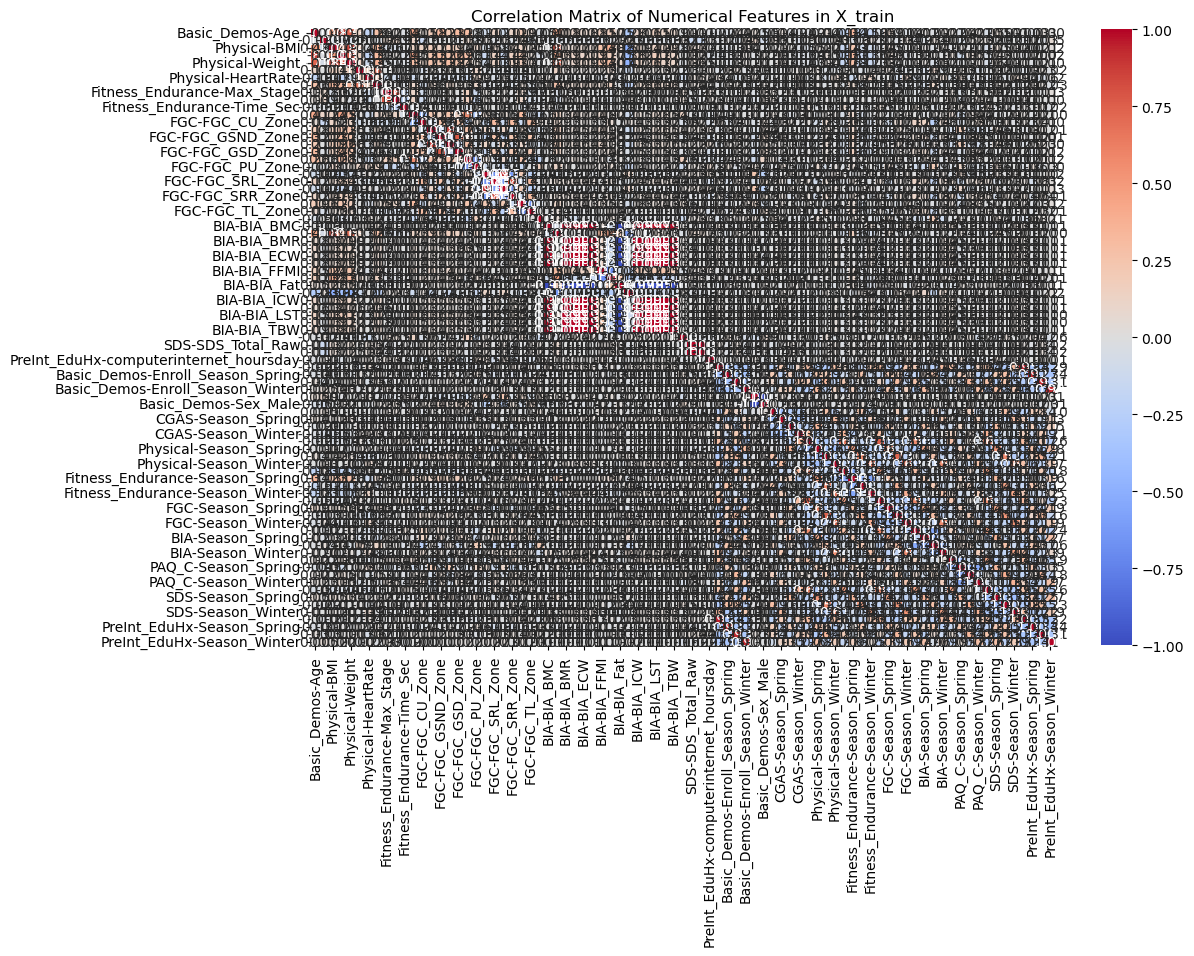

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features in X_train")
plt.show()

In [39]:
threshold = 0.9

high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1] # removing self correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

print("Highly correlated feature pairs (correlation > 0.9):\n")
print(high_corr_pairs)

Highly correlated feature pairs (correlation > 0.9):

Basic_Demos-Sex_Female            Basic_Demos-Sex_Male                1.000000
Basic_Demos-Sex_Male              Basic_Demos-Sex_Female              1.000000
BIA-BIA_FFM                       BIA-BIA_BMR                         1.000000
BIA-BIA_BMR                       BIA-BIA_FFM                         1.000000
BIA-BIA_TBW                       BIA-BIA_BMR                         0.999652
                                                                        ...   
Basic_Demos-Enroll_Season_Summer  PreInt_EduHx-Season_Summer          0.931468
PreInt_EduHx-Season_Spring        Basic_Demos-Enroll_Season_Spring    0.919438
Basic_Demos-Enroll_Season_Spring  PreInt_EduHx-Season_Spring          0.919438
FGC-FGC_SRL                       FGC-FGC_SRR                         0.914535
FGC-FGC_SRR                       FGC-FGC_SRL                         0.914535
Length: 124, dtype: float64


In [40]:
features_to_drop = set()
for feature1, feature2 in high_corr_pairs.index:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        # Drop one feature (arbitrarily choose feature2)
        features_to_drop.add(feature2)

print(f"Number of columns to drop: {len(features_to_drop)}")
print(f"Columns to drop: {features_to_drop}")

Number of columns to drop: 17
Columns to drop: {'BIA-BIA_ECW', 'BIA-BIA_DEE', 'BIA-BIA_BMR', 'PreInt_EduHx-Season_Winter', 'Basic_Demos-Enroll_Season_Fall', 'BIA-BIA_ICW', 'BIA-BIA_BMC', 'BIA-BIA_TBW', 'Basic_Demos-Enroll_Season_Summer', 'SDS-SDS_Total_T', 'BIA-BIA_Fat', 'Basic_Demos-Sex_Male', 'BIA-BIA_LDM', 'FGC-FGC_SRR', 'Basic_Demos-Enroll_Season_Spring', 'BIA-BIA_FFM', 'BIA-BIA_SMM'}


In [41]:
X_train = X_train.drop(columns=list(features_to_drop))
X_train.shape

(2736, 66)

In [42]:
type(y)

pandas.core.frame.DataFrame

In [43]:
y_squeezed = y.squeeze()

In [44]:
from sklearn.feature_selection import chi2, f_classif
from scipy.stats import pearsonr
import pandas as pd

# Function to calculate feature importance
def calculate_feature_importance(X_train, y):
    feature_scores = []
    
    # Make sure y is a 1D array-like structure (like a Series)
    y = y.values if isinstance(y, pd.DataFrame) else y  # In case y is a DataFrame, convert to array
    
    for column in X_train.columns:
        if X_train[column].dtype == 'object':  # X column is categorical
            if y.dtype == 'object':  # Both X and y are categorical
                chi2_score, _ = chi2(X_train[[column]], y)
                feature_scores.append((column, chi2_score[0], 'Chi-Square'))
            else:  # X is categorical, y is numerical
                f_stat, _ = f_classif(X_train[[column]], y)
                feature_scores.append((column, f_stat[0], 'F-Statistic'))
        else:  # X column is numerical
            if y.dtype != 'object':  # Both X and y are numerical
                corr, _ = pearsonr(X_train[column], y)
                feature_scores.append((column, abs(corr), 'Pearson R'))
            else:  # X is numerical, y is categorical
                f_stat, _ = f_classif(X_train[[column]], y)
                feature_scores.append((column, f_stat[0], 'F-Statistic'))
    
    # Create a DataFrame for results
    importance_df = pd.DataFrame(feature_scores, columns=['Feature', 'Score', 'Method'])
    return importance_df.sort_values(by='Score', ascending=False)

# Calculate feature importance
importance_df = calculate_feature_importance(X_train, y_squeezed)


In [45]:
print('Importance of features: \n', importance_df)

Importance of features: 
                        Feature     Score     Method
0              Basic_Demos-Age  0.365990  Pearson R
3              Physical-Height  0.360489  Pearson R
4              Physical-Weight  0.316554  Pearson R
31           SDS-SDS_Total_Raw  0.219720  Pearson R
2                 Physical-BMI  0.213332  Pearson R
..                         ...       ...        ...
65  PreInt_EduHx-Season_Summer  0.004926  Pearson R
30           PAQ_C-PAQ_C_Total  0.004124  Pearson R
35            CGAS-Season_Fall  0.003912  Pearson R
10  Fitness_Endurance-Time_Sec  0.003877  Pearson R
12             FGC-FGC_CU_Zone  0.001482  Pearson R

[66 rows x 3 columns]


In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and validation sets (if needed)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on training data
xgb_model.fit(X_train_split, y_train_split)

# Make predictions
y_pred = xgb_model.predict(X_val_split)

# Evaluate the model performance
accuracy = accuracy_score(y_val_split, y_pred)
print(f"Accuracy on validation data: {accuracy:.4f}")

# Get feature importance
feature_importances = xgb_model.feature_importances_

# Create a DataFrame of feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importance:")
print(importance_df)


c:\Users\sudha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:30:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on validation data: 0.5712
Feature Importance:
                                   Feature  Importance
0                          Basic_Demos-Age    0.040182
45         Fitness_Endurance-Season_Summer    0.025828
51                         BIA-Season_Fall    0.025068
46         Fitness_Endurance-Season_Winter    0.023453
32  PreInt_EduHx-computerinternet_hoursday    0.023119
..                                     ...         ...
39                    Physical-Season_Fall    0.009757
50                       FGC-Season_Winter    0.009431
12                         FGC-FGC_CU_Zone    0.009165
20                        FGC-FGC_SRL_Zone    0.006774
54                       BIA-Season_Winter    0.005858

[66 rows x 2 columns]


In [48]:
len(df_train.columns)

60

In [49]:
nan_percentage = (df_train.isna().sum()/len(df_train))*100
print("Percentage of NaN values in each column:\n", nan_percentage)

df_train = df_train.loc[:, nan_percentage <= 80]

Percentage of NaN values in each column:
 id                                         0.000000
Basic_Demos-Enroll_Season                  0.000000
Basic_Demos-Age                            0.000000
Basic_Demos-Sex                            0.000000
CGAS-Season                               35.479798
CGAS-CGAS_Score                           38.863636
Physical-Season                           16.414141
Physical-BMI                              23.686869
Physical-Height                           23.560606
Physical-Weight                           22.323232
Physical-Waist_Circumference              77.323232
Physical-Diastolic_BP                     25.404040
Physical-HeartRate                        25.075758
Physical-Systolic_BP                      25.404040
Fitness_Endurance-Season                  66.969697
Fitness_Endurance-Max_Stage               81.237374
Fitness_Endurance-Time_Mins               81.313131
Fitness_Endurance-Time_Sec                81.313131
FGC-Season            